## Tutorial: Censure and ORB

==============================================================================================
## Descriptors extraction for object detection based on ORB
==============================================================================================

In this tutorial we focuss on the following main topics:

- 1) Image Feature detector by CENSURE
- 2) Image Feature descriptors by ORB
- 3) Image matching (recognition by correspondence) based on feature extraction (ORB)
    


# 1. CENSURE

What is CENSURE doing? 

Let's read a face image. Where are the image features detected?


(338, 450, 3)


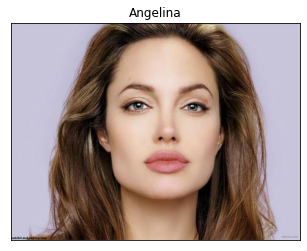

In [2]:
from skimage import data
from skimage import transform
from skimage.feature import CENSURE
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage import io

img_orig=io.imread('images/angelina.jpg')
print(img_orig.shape)
plt.imshow(img_orig)
plt.xticks([])
plt.yticks([])
plt.title('Angelina')
plt.show()
  

Explore the parameters of the CENSURE detector. 

How does the CENSURE depend on the type of the image?

How does the CENSURE depend on the scale, rotation, and change of contrast of the image?

Check the CENSURE detectors of facial images vs nature images.


I found  18 keypoints


Text(0.5, 1.0, "Keypoints in Angelina's Image")

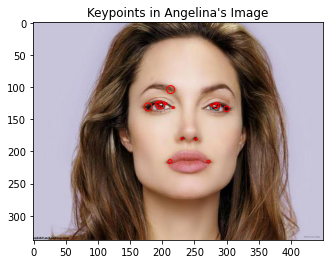

In [3]:
  
img_gr = rgb2gray(img_orig)

detector = CENSURE()
detector.detect(img_gr)
print('I found ', len(detector.keypoints), 'keypoints')

plt.imshow(img_orig, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Keypoints in Angelina's Image")

Let's change the parameters of the function CENSURE.

I found  112 keypoints


Text(0.5, 1.0, "Angelina's Image")

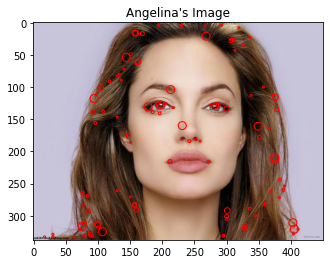

In [4]:

detector = CENSURE(non_max_threshold=0.05)
detector.detect(img_gr)
print('I found ', len(detector.keypoints), 'keypoints')

plt.imshow(img_orig, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Angelina's Image")



**Exercise:** Which is the effect of changing the parameter 'non_max_threshold'?

I found  41 keypoints


Text(0.5, 1.0, "Angelina's Image")

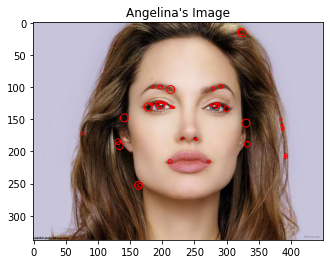

In [5]:

detector = CENSURE(line_threshold=50)
detector.detect(img_gr)
print('I found ', len(detector.keypoints), 'keypoints')

plt.imshow(img_orig, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Angelina's Image")

**Exercise:** Which is the effect of changing the parameter 'line_threshold'?

**Exercise:** Make more changes of parameters and discuss the effect.

Compute Censure keypoints after rotation.

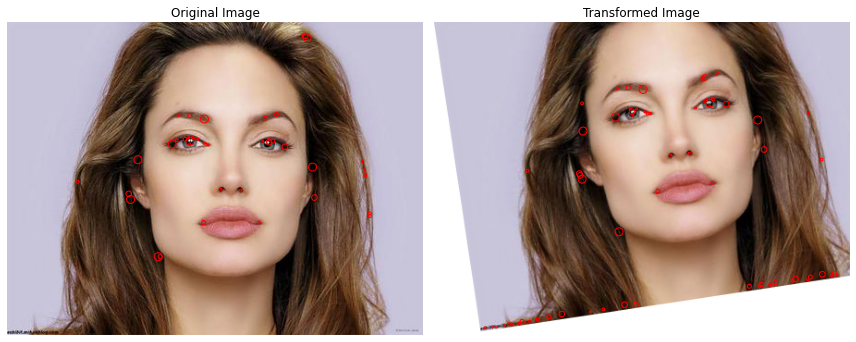

In [6]:
tform = transform.AffineTransform(scale=(1, 1), rotation=0.15)

img_warp = transform.warp(img_orig, tform,  mode='constant', cval=1)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_orig)
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(rgb2gray(img_warp))

ax[1].imshow(img_warp)
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Compute Censure keypoints after rescaling.

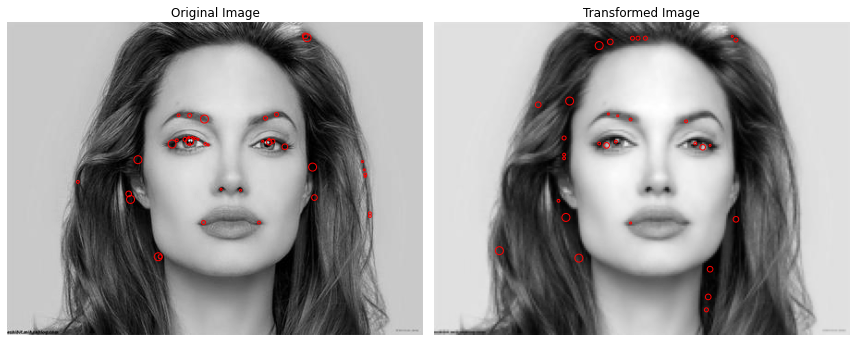

In [7]:
from skimage.transform import rescale

img_small = rescale(img_gr,.5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_gr, cmap='gray')
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_small)

ax[1].imshow(img_small, cmap='gray')
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Compute Censure keypoints after change of contrast.

In [8]:
print(img_gr.min(), img_gr.max()) 



0.0 0.9916517647058823


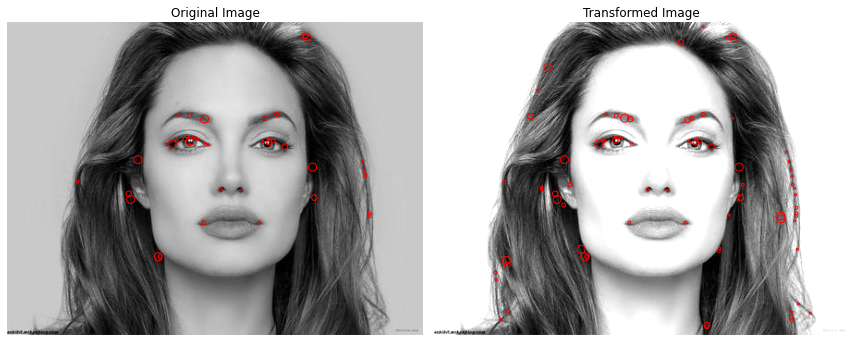

In [9]:
from skimage.exposure import rescale_intensity

img_dark = rescale_intensity(img_gr, in_range=(0, 0.7))



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_gr, cmap='gray')
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_dark)

ax[1].imshow(img_dark, cmap='gray')
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Compute Censure keypoints in a nature image.

(194, 259, 3)


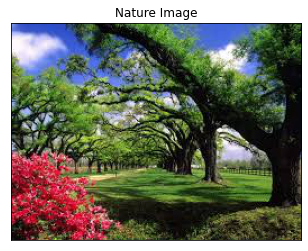

I found  99 keypoints


Text(0.5, 1.0, 'Keypoints in Nature Image')

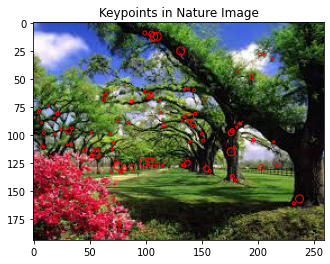

In [10]:

img_orig=io.imread('images/nature3.jpeg')
print(img_orig.shape)
plt.imshow(img_orig)
plt.xticks([])
plt.yticks([])
plt.title('Nature Image')
plt.show()

img_gr=rgb2gray(img_orig)
detector = CENSURE()
detector.detect(img_gr)
print('I found ', len(detector.keypoints), 'keypoints')

plt.imshow(img_orig, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Keypoints in Nature Image")




Let's change the parameters of the function CENSURE.

I found  497 keypoints


Text(0.5, 1.0, 'Nature Image')

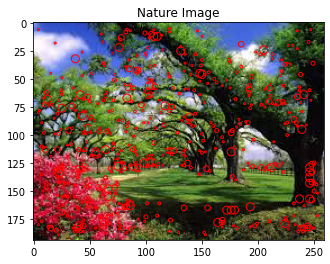

In [11]:
detector = CENSURE(non_max_threshold=0.05)
detector.detect(img_gr)
print('I found ', len(detector.keypoints), 'keypoints')

plt.imshow(img_orig, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Nature Image")



I found  122 keypoints


Text(0.5, 1.0, 'Nature Image')

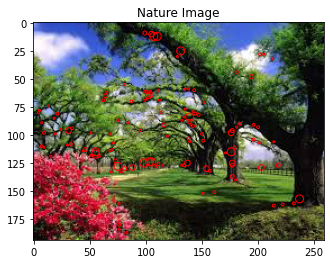

In [12]:

detector = CENSURE(line_threshold=50)
detector.detect(img_gr)
print('I found ', len(detector.keypoints), 'keypoints')

plt.imshow(img_orig, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Nature Image")

**Exercise:** Make more changes of parameters and discuss the effect.

Compute Censure keypoints after rotation.

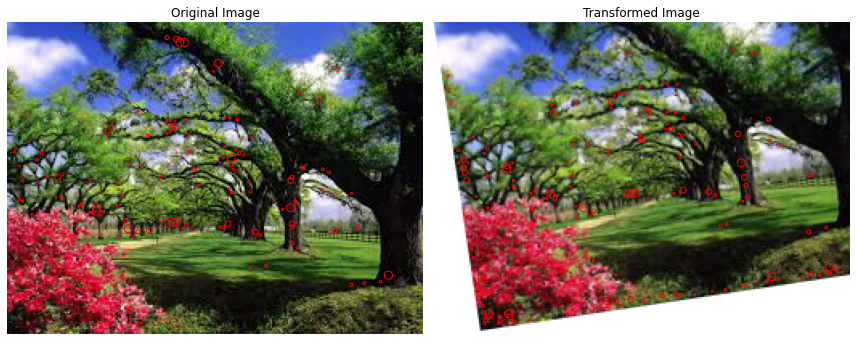

In [13]:
tform = transform.AffineTransform(scale=(1, 1), rotation=0.15)

img_warp = transform.warp(img_orig, tform,  mode='constant', cval=1)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_orig)
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(rgb2gray(img_warp))

ax[1].imshow(img_warp)
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Compute Censure keypoints after rescaling.

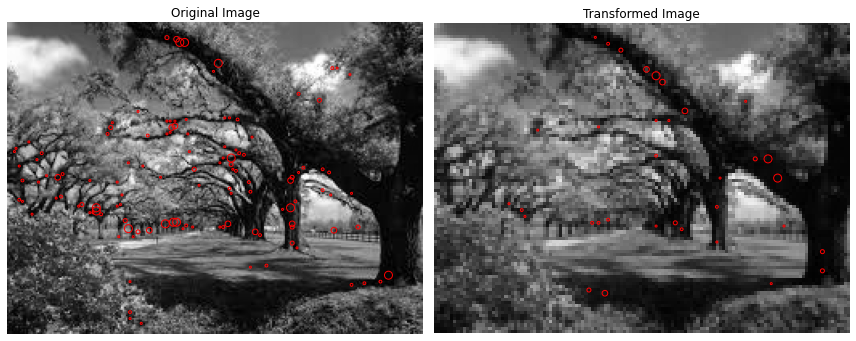

In [14]:
from skimage.transform import rescale

img_small = rescale(img_gr,.5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_gr, cmap='gray')
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_small)

ax[1].imshow(img_small, cmap='gray')
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Compute Censure keypoints after change of contrast.

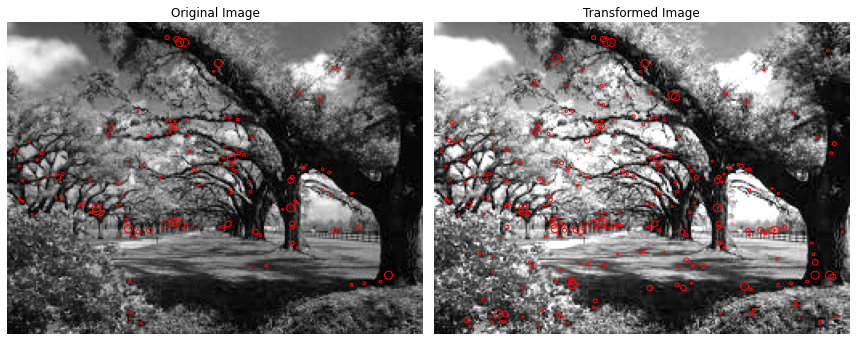

In [15]:
from skimage.exposure import rescale_intensity

img_dark = rescale_intensity(img_gr, in_range=(0, 0.7))



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_gr, cmap='gray')
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_dark)

ax[1].imshow(img_dark, cmap='gray')
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

**Exercise**: Discuss what you observe and write your conclusions.

# 2. ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us apply ORB using the `ORB` function within the module `skimage.feature`.
                             
See an example in [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html).

What is ORB doing? 

Let's run the ORB detector on the face image. Where are the image feature detected?

Explore the parameters of the ORB detector. 

How does the ORB depend on the type of the image?

How does the ORB depend on the scale, rotation, and change of contrast of the image?

Check the ORB detectors of facial images vs nature images.

(338, 450, 3)


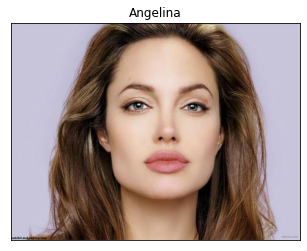

I found  500 keypoints


Text(0.5, 1.0, "Keypoints in Angelina's Image")

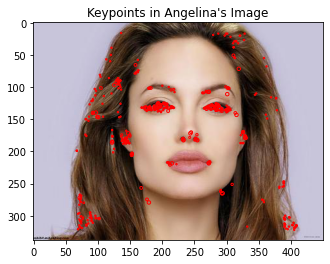

In [16]:
from skimage.feature import ORB

img_orig=io.imread('images/angelina.jpg')
print(img_orig.shape)
plt.imshow(img_orig)
plt.xticks([])
plt.yticks([])
plt.title('Angelina')
plt.show()

img_gr = rgb2gray(img_orig)

detector = ORB()
detector.detect(img_gr)
print('I found ', len(detector.keypoints), 'keypoints')

plt.imshow(img_orig, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Keypoints in Angelina's Image")


Let's change the parameters

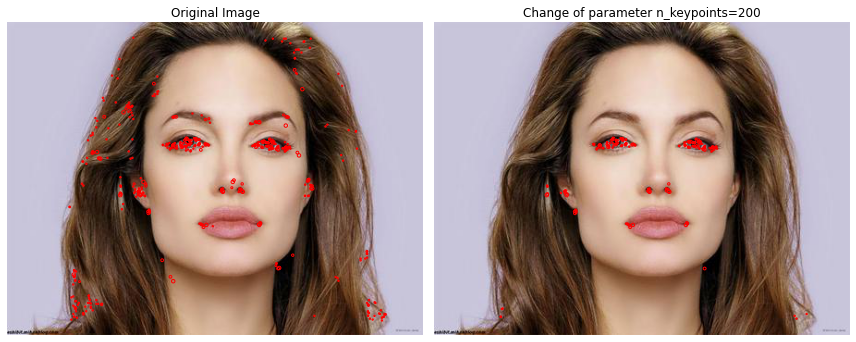

In [17]:
detector1 = ORB()

detector2 = ORB(n_keypoints=200)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector1.detect(img_gr)

ax[0].imshow(img_orig, cmap='gray')
ax[0].scatter(detector1.keypoints[:, 1], detector1.keypoints[:, 0],
              2 ** detector1.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector2.detect(img_gr)

ax[1].imshow(img_orig, cmap='gray')
ax[1].scatter(detector2.keypoints[:, 1], detector2.keypoints[:, 0],
              2 ** detector2.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Change of parameter n_keypoints=200')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()



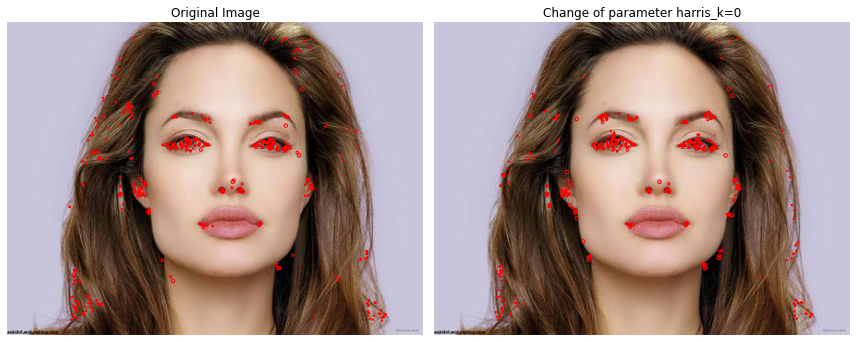

In [18]:
detector1 = ORB()
detector2 = ORB(harris_k=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector1.detect(img_gr)

ax[0].imshow(img_orig, cmap='gray')
ax[0].scatter(detector1.keypoints[:, 1], detector1.keypoints[:, 0],
              2 ** detector1.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector2.detect(img_gr)

ax[1].imshow(img_orig, cmap='gray')
ax[1].scatter(detector2.keypoints[:, 1], detector2.keypoints[:, 0],
              2 ** detector2.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Change of parameter harris_k=0')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()




**Exercise:** Make more changes of parameters and discuss the effect.

Compute ORB keypoints after rotation.

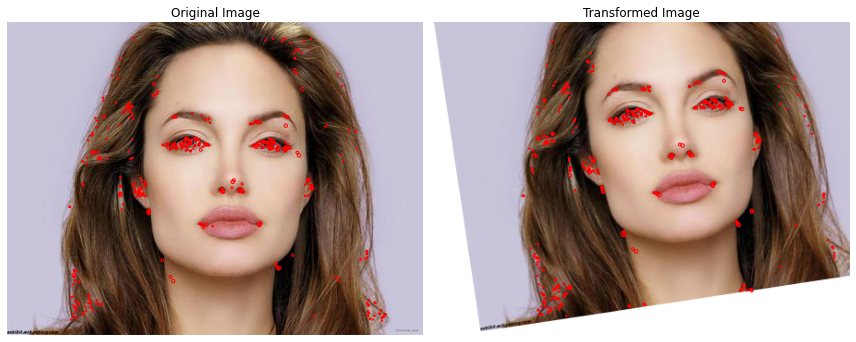

In [19]:
tform = transform.AffineTransform(scale=(1, 1), rotation=0.15)

img_warp = transform.warp(img_orig, tform,  mode='constant', cval=1)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_orig)
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(rgb2gray(img_warp))

ax[1].imshow(img_warp)
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

**Exercise**: Do you think the result is invariant to rotation? Write your conclusions.

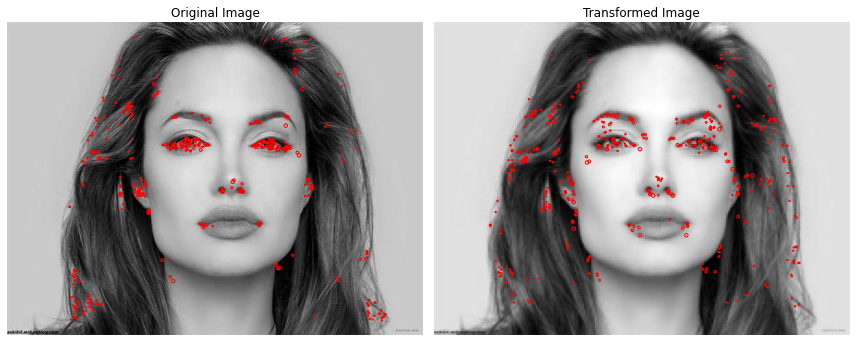

In [20]:

img_small = rescale(img_gr,.5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_gr, cmap='gray')
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_small)

ax[1].imshow(img_small, cmap='gray')
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

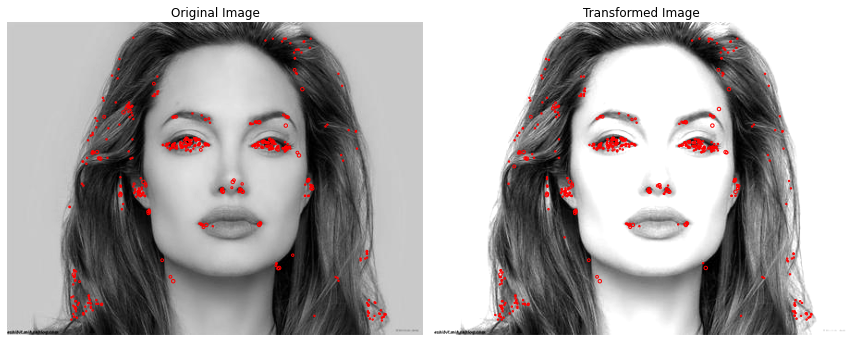

In [21]:

img_dark = rescale_intensity(img_gr, in_range=(0, 0.7))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_gr, cmap='gray')
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_dark)

ax[1].imshow(img_dark, cmap='gray')
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

**Exercise**: Discuss the results with your classmates and write your conclusions.

Let's use the nature image 

(194, 259, 3)


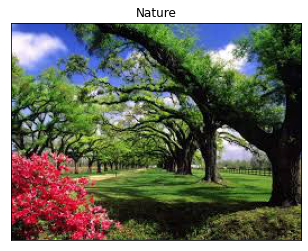

I found  500 keypoints


Text(0.5, 1.0, 'Keypoints in Nature Image')

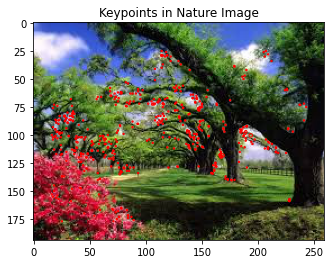

In [22]:

img_orig=io.imread('images/nature3.jpeg')
print(img_orig.shape)
plt.imshow(img_orig)
plt.xticks([])
plt.yticks([])
plt.title('Nature')
plt.show()

img_gr=rgb2gray(img_orig)
detector = ORB()
detector.detect(img_gr)
print('I found ', len(detector.keypoints), 'keypoints')

plt.imshow(img_orig, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Keypoints in Nature Image")




**Exercise:** Make changes of parameters and discuss the effect.

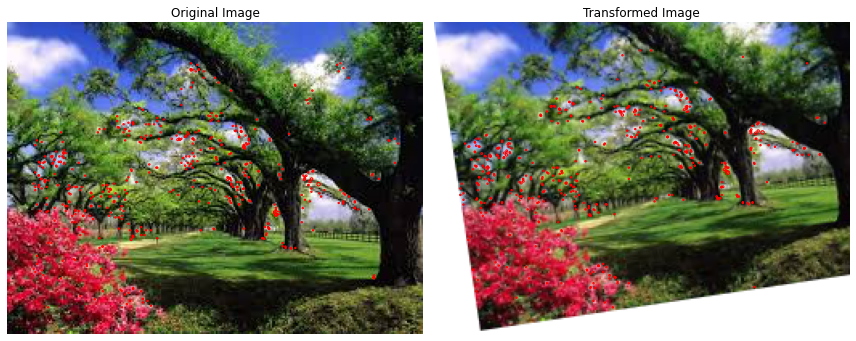

In [23]:
tform = transform.AffineTransform(scale=(1, 1), rotation=0.15)

img_warp = transform.warp(img_orig, tform,  mode='constant', cval=1)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_orig)
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(rgb2gray(img_warp))

ax[1].imshow(img_warp)
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

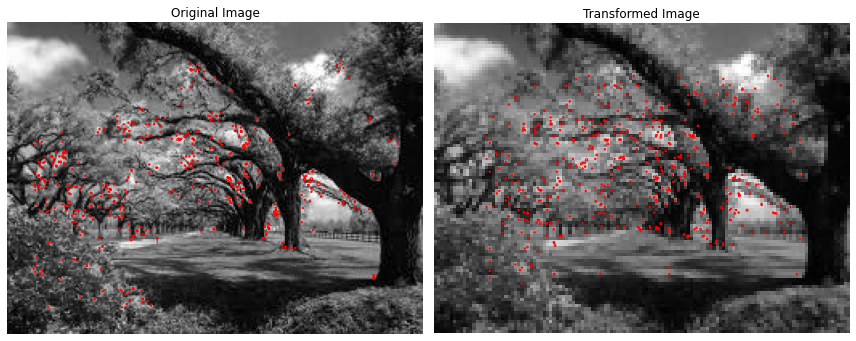

In [24]:

img_small = rescale(img_gr,.5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_gr, cmap='gray')
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_small)

ax[1].imshow(img_small, cmap='gray')
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

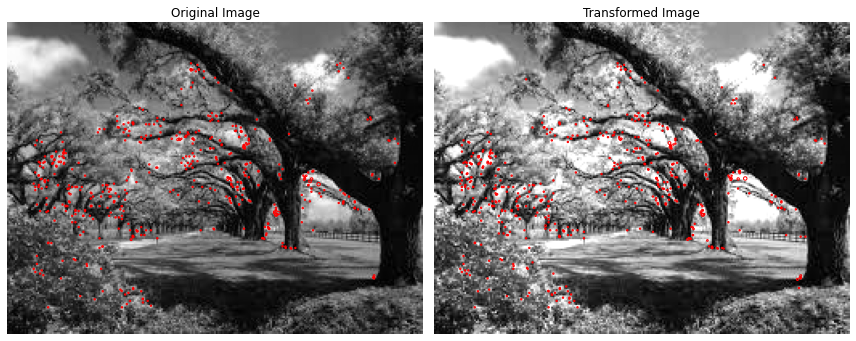

In [25]:
img_dark = rescale_intensity(img_gr, in_range=(0, 0.7))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_gr)

ax[0].imshow(img_gr, cmap='gray')
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_dark)

ax[1].imshow(img_dark, cmap='gray')
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

**Exercise**: Observe the results and write your conclusions about the invariance to rotation, scale and change of contrast.

# 3. Using ORB feature detector to match transformed images

In [26]:
%matplotlib inline

In [27]:
from skimage.feature import match_descriptors

img = io.imread('./images/Building.jpg')
img1 = rgb2gray(img)

img2 = transform.rotate(img1, 180)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)

keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)

keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)


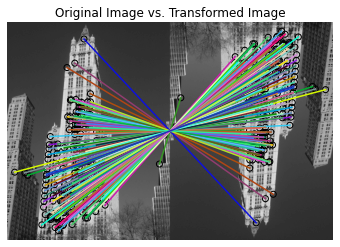

In [28]:
from skimage.feature import plot_matches

# Visualize the results:
fig, ax = plt.subplots(nrows=1, ncols=1)

plt.gray()

plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")


plt.show()

**Exercise:** Analyze and comment the observed result. Do you think it is good enough? 

In [29]:
from skimage.feature  import match_descriptors, plot_matches

# Let's do another transformation
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                                  translation=(0, -200))
img3 = transform.warp(img1, tform)

descriptor_extractor.detect_and_extract(img3)

keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

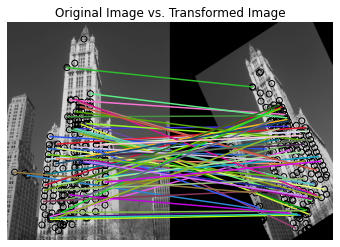

In [30]:
# Visualize the results:

fig, ax = plt.subplots(nrows=1, ncols=1)

plt.gray()

plot_matches(ax, img1, img3, keypoints1, keypoints3, matches13)
ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")


plt.show()



**Exercise:** Analyze and comment the observed result. Do you think it is good enough? Are the matches all correct?


In [31]:

img3 = rescale(img1,.5)

descriptor_extractor.detect_and_extract(img3)

keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

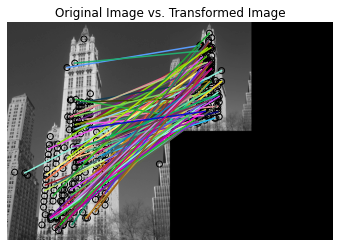

In [32]:
# Visualize the results:

fig, ax = plt.subplots(nrows=1, ncols=1)

plt.gray()

plot_matches(ax, img1, img3, keypoints1, keypoints3, matches13)
ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")


plt.show()



**Exercise:** Analyze and comment the observed result. Do you think it is good enough? 

In [33]:

img3 = rescale_intensity(img1, in_range=(0, 0.7))

descriptor_extractor.detect_and_extract(img3)

keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

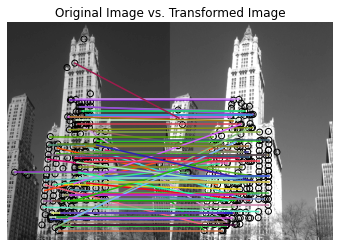

In [34]:
# Visualize the results:

fig, ax = plt.subplots(nrows=1, ncols=1)

plt.gray()

plot_matches(ax, img1, img3, keypoints1, keypoints3, matches13)
ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")


plt.show()



**Exercise:** Analyze and comment the observed result. Do you think it is good enough? 

Try to match ORB detectors between facial and nature image. 

In [35]:

img1=io.imread('images/angelina.jpg')
img1 = rgb2gray(img1)

img2=io.imread('images/nature3.jpeg')
img2 = rgb2gray(img2)



descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)

keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)

keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)




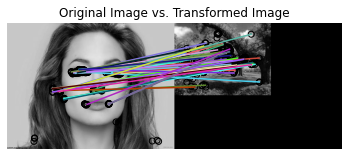

In [36]:
# Visualize the results:

fig, ax = plt.subplots(nrows=1, ncols=1)

plt.gray()

plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")


plt.show()

**Exercise:** Analyze and comment the observed result. Do you think it is good enough? 